# Hall effect analysis

Use this template as a starting point to carry out the analysis tasks.  For reference, here are links to recommended Python resources: the [Whirlwind Tour of Python](https://jakevdp.github.io/WhirlwindTourOfPython/) and the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) both by Jake VanderPlas.

## Standard Packages

This is a good idea at the beginning of your notebook to include the packages that you will need.  We will use those shown below here.  A brief description:
* `numpy` is the foundational package for Python numerical work. It extends and speeds up array operations beyond standard Python, and it includes almost all math functions that you would need for example `sqrt()` (square root) or `cos()` (cosine).  These would be written in code as `np.sqrt()` or `np.cos()`.
* `scipy` is a huge collection of scientific data analysis functions, routines, physicical constants, etc.  This is the second most used package for scientific work. Here we will use the physical constants library, `scipy.constants`.  Documentation is at [SciPy.org](https://docs.scipy.org/doc/scipy/reference/) with the constants subpackage at https://docs.scipy.org/doc/scipy/reference/constants.html.
* `uncertainties` is a very useful small package that simplifies uncertainty propagation and printing out of quantities with uncertainty. Documentation is at https://pythonhosted.org/uncertainties/
* `matplotlib` is *the* standard plotting package for scientific Python.  We will use a subset called `pyplot` which is modeled after the plotting functions used in MATLAB. The last line below, `%matplotlib inline`, simply forces the plots to appear within the notebook.
* `pandas` is a large data science package.  It's main feature is a set of methods to create and manipulate a "DataFrame," which is an enlargement of the idea of an array.  I plays well with NumPy and other packages.  We will use it mainly as a way to read files into data sets in an easy way.
* [LMFit](https://lmfit.github.io/lmfit-py/) is excellent for carrying out line and curve fits with many useful features.

## Getting Help

See the example code for a wide range of actions in notebooks created by Prof. Marjorie Olmstead and Prof. David Pengra in this repository: [**Physics431/Examples**](https://github.com/Physics431/Examples).

You can pull the examples into your environment with the following command.  (Only do this once, or you will get an error):

    git clone https://github.com/Physics431/Examples

## Task Summary

1. If not already done, enter the raw data into a spreadsheet, save the file(s) and make them available to the members of the group.  You should have at least 4 different tables: measurements for each probe plus the measurements of the magnetic field
2. Import the magnetic field measurements.  Calculate a mean and standard deviation for the magnetic field $B$ at the location of the probes between the poles.
3. Import the measurements from each probe. Calculate $2V_H$ for each value of $I_x$  for each probe, as described in the instructions.  Show a code snippet that does this or describe the calculation in your group notebook with an example.
4. Plot $2V_H$ versus $I_x$  for each sample and fit a line to it using LMfit.  Obtain the fit coefficients and their uncertainty.
5. Calculate the Hall coefficient $R_H$ for each probe and propagate the uncertainty from the fit, uncertainty in the magnetic field, and uncertainties in the probe specifications given in Table 1 in the instructions.
6. Determine the source of the largest statistical uncertainty, and explain how this was determined. 
7. Calculate the conductivity of the sample material and its uncertainty for all three samples.
8. Calculate the Hall mobility $\mu$ for the InAs probe.  (You can also calculate a mobility for the metal probes, but its meaning is suspect.)

In [193]:
# Usually import packages via a handle to the functions in them using import ... as ...
#
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import uncertainties as unc
%matplotlib inline

In [194]:
# Useful plot default
mpl.rcParams['figure.figsize'] = 12.0,8.0  # Roughly 12 cm wde by 8 cm high
mpl.rcParams['font.size'] = 14.0 # Use 14 point font

## Read in the B-field data

If the data files are spreadsheet files with comma-separated values (CSV) they can be read in with Pandas `pd.read_csv()`:
    
    B_data = pd.read_csv('Hall_magnet_measurements.csv')


In [195]:
# You code this
B_data = pd.read_csv('./Hall-Effect-Data/Voltage Readings - Probing magnet.csv')


Calculate the average value of the field and its standard deviation, correcting for the sign reversal.  One way to do this is to create a new NumPy array that holds all values as absolute-values, and then use the methods within the array.  

In [196]:
# You code this
B_abs_data = B_data.drop(columns=['Position'])
B_abs_data = np.abs(B_abs_data.to_numpy().flatten())

B = np.mean(B_abs_data)
sigma_B  = np.std(B_abs_data)

In [197]:
# Create an uncertainty object that holds the feild and its uncertainty.

# You need the values of B and its uncertainty 
uB = unc.ufloat(B,sigma_B,'B') # the extra label is a "tag" that can be used with some of the Uncertainties functions
print('The field strength of the magnet = {:.4uP} kG'.format(uB))

The field strength of the magnet = 1.29491±0.05968 kG


## Read in the probe data

As before, use `pd.read_csv()`.

Then for each, create an array that gives $2V_H$, twice the hall voltage.  Be careful with signs! 

In [198]:
# Start with aluminum probe data
# You code this
al_df = pd.read_csv('./Hall-Effect-Data/Voltage Readings - Aluminum.csv')
drop_columns = ['delta V (mV)', 'delta V mean', 'Unnamed: 5','Deviation']
al_df = al_df.drop(columns=drop_columns)
al_df.head()

,Current (mA),Voltage White up (mV),Voltage green up (mV)
0,30.24,0.10155,0.10218
1,30.24,0.10150,0.10200
2,30.24,0.10148,0.10207
3,60.01,0.20069,0.20213
4,60.01,0.20055,0.20203


In [199]:
def create_2V_H(df:pd.DataFrame) -> None:
    '''
    Adds a column to the dataframe that contains 2V_H. This is the difference between the two voltage columns
    '''
    df['2V_H (mV)'] = df['Voltage green up (mV)'] - df['Voltage White up (mV)']


In [200]:
# Calculate 2VH
# Recommended: add it as a column in the existing dataframe.

create_2V_H(al_df)

al_df.head()

,Current (mA),Voltage White up (mV),Voltage green up (mV),2V_H (mV)
0,30.24,0.10155,0.10218,0.00063
1,30.24,0.10150,0.10200,0.00050
2,30.24,0.10148,0.10207,0.00059
3,60.01,0.20069,0.20213,0.00144
4,60.01,0.20055,0.20203,0.00148


In [201]:
# Repeat for gold probe data

# read in data and remove unecissary columns 
au_df = pd.read_csv('./Hall-Effect-Data/Voltage Readings - Gold.csv')
drop_columns = ['delta V (mV)', 'delta V mean', 'Unnamed: 5','Deviation']
au_df = au_df.drop(columns=drop_columns)


# Add the 2V_H column

create_2V_H(au_df)
au_df.head()


,Current (mA),Voltage White up (mV),Voltage green up (mV),2V_H (mV)
0,30.53,-0.02334,-0.01992,0.00342
1,30.53,-0.02338,-0.01992,0.00346
2,30.53,-0.02351,-0.01998,0.00353
3,60.67,-0.04761,-0.04088,0.00673
4,60.67,-0.04765,-0.04094,0.00671


In [202]:
# Repeat for InAs probe data

# read in data and remove unecissary columns 
InAs_df = pd.read_csv('./Hall-Effect-Data/Voltage Readings - Semiconductor.csv')
drop_columns = ['delta V (mV)', 'delta V mean', 'Unnamed: 5','Deviation']
InAs_df = InAs_df.drop(columns=drop_columns)


# Add the 2V_H column

create_2V_H(InAs_df)
InAs_df.head()


,Current (mA),Voltage White up (mV),Voltage green up (mV),2V_H (mV)
0,15.02,-2.62340,2.65821,5.28161
1,15.02,-2.62310,2.65763,5.28073
2,15.02,-2.62435,2.65710,5.28145
3,30.04,-5.24493,5.31124,10.55617
4,30.04,-5.24350,5.31165,10.55515


Before Plotting I will need to do some averaging as we have multiple readings of 2V_H for each value of the current. So I will go through and take the average of the 2V_H value for each of the currents. 

In [203]:
np.mean(al_df[al_df['Current (mA) '] == 30.24]['2V_H (mV)'])

0.0005733333333333285

In [204]:
def get_averaged_df(df:pd.DataFrame) -> pd.DataFrame:
    '''
    This function finds the unique values of current and averages the 2V_H values corresponding to that current. 
    Then it creates a new dataframe containing this averaged data. 
    '''
    current_list = df['Current (mA) '].unique().tolist()

    averaged_list = []

    for current in current_list:
        temp_dict = {}
        temp_dict['Current (mA)'] = current
        temp_dict['2V_H (mV)'] = np.mean(df[df['Current (mA) '] == current]['2V_H (mV)'])
        averaged_list.append(temp_dict)

    return pd.DataFrame(averaged_list)

In [205]:
# call our get averaged df function
al_averaged_df = get_averaged_df(al_df)
au_averaged_df = get_averaged_df(au_df)
InAs_averaged_df = get_averaged_df(InAs_df)

## Make a couple of plots

The metal probes typically have similar Hall voltages. You should plot them on the same graph to compare, but InAs has much higher values and would need its own plot.

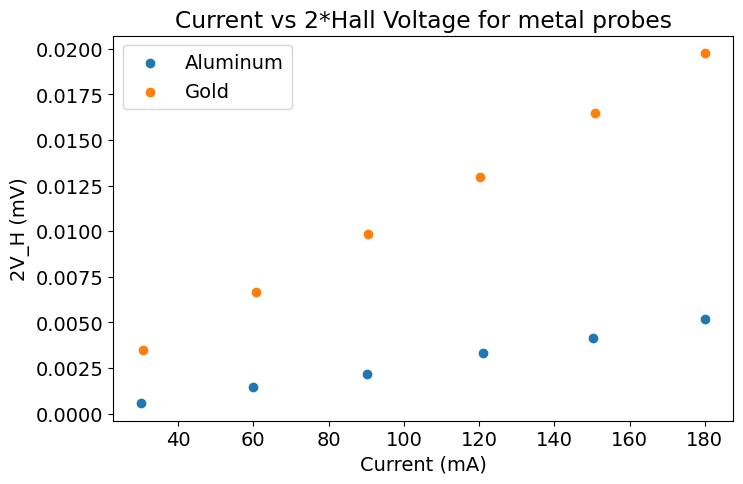

In [206]:
# See the examples for how to make a plot
# Metal probes first.

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(al_averaged_df['Current (mA)'], al_averaged_df['2V_H (mV)'], label='Aluminum')
ax.scatter(au_averaged_df['Current (mA)'], au_averaged_df['2V_H (mV)'], label='Gold')
ax.set_xlabel('Current (mA)')
ax.set_ylabel('2V_H (mV)')
ax.set_title('Current vs 2*Hall Voltage for metal probes')
ax.legend()






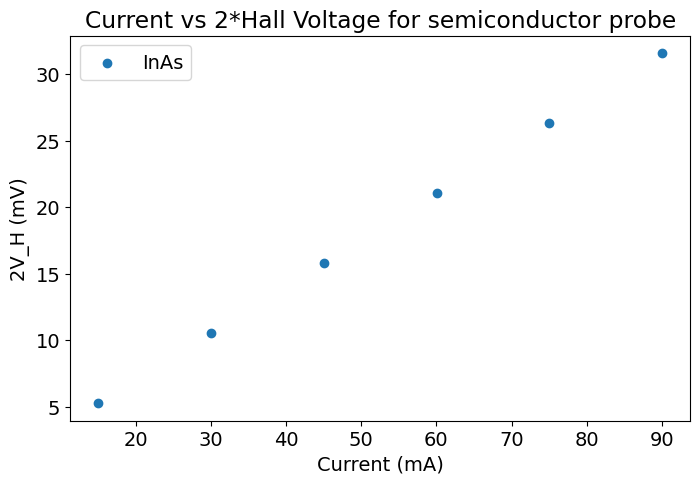

In [207]:
# Plot data for InAs probe

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(InAs_averaged_df['Current (mA)'], InAs_averaged_df['2V_H (mV)'], label='InAs')
ax.set_xlabel('Current (mA)')
ax.set_ylabel('2V_H (mV)')
ax.set_title('Current vs 2*Hall Voltage for semiconductor probe')
ax.legend()

## Fit the data to extract the slope of $2V_H/I_x$

Use LMfit.  See the examples.

In [208]:
# Set  up the Model  This cell does the import and model instance creation

# Import the Linear model.
# You only do this once in a notebook
from lmfit.models import LinearModel

# create an instance of the model
# You only need to do this once
line = LinearModel()


In [209]:
# Aluminum first
#
# Get starting parameters with the guess() method
al_param_guess = line.guess(al_averaged_df['2V_H (mV)'], x=al_averaged_df['Current (mA)'])


# Feed these into the fitter and run it.

Al_fit = line.fit(al_averaged_df['2V_H (mV)'], al_param_guess, x=al_averaged_df['Current (mA)'])

# Print the results
Al_fit

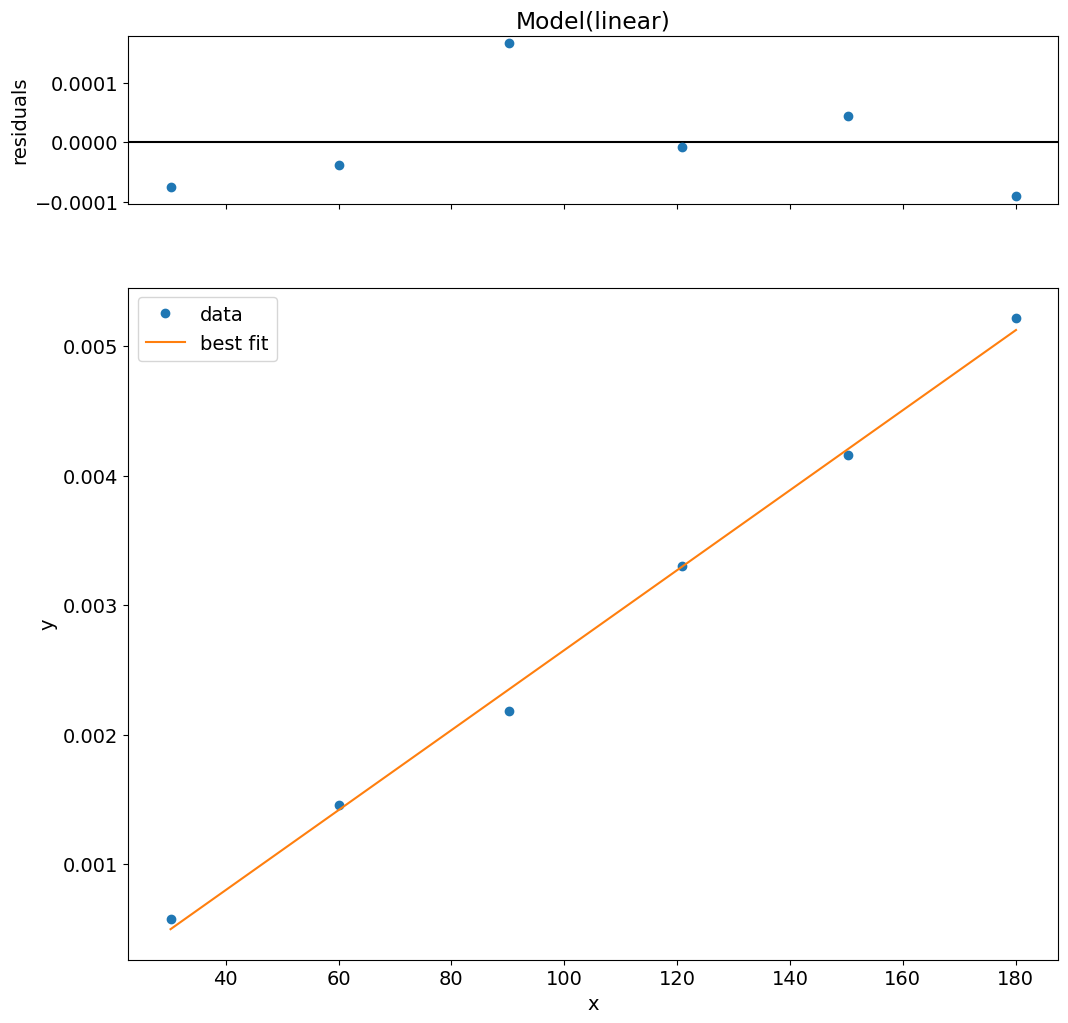

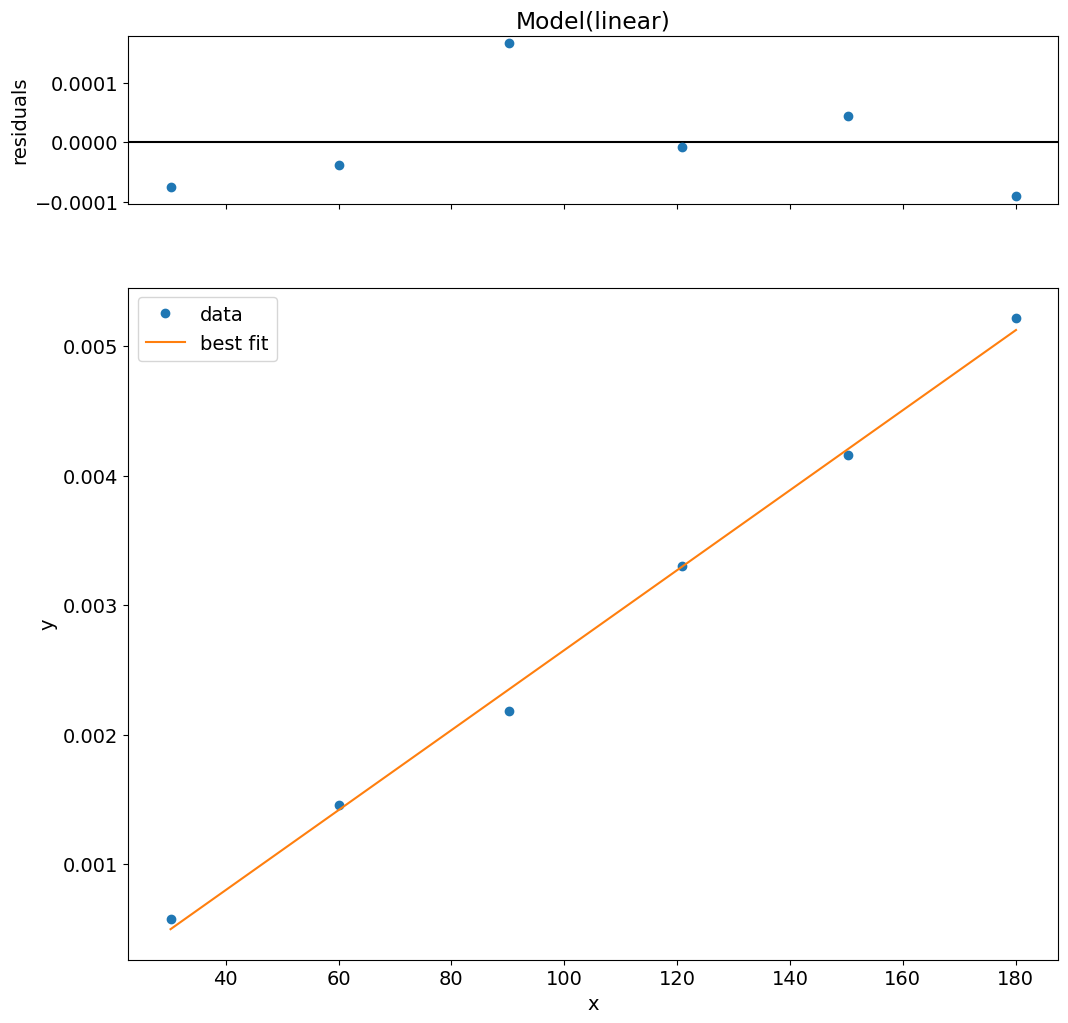

In [210]:
# Make a plot
Al_fit.plot()

### Extract the slope with uncertainty from the fit parameters


In [211]:
# See the examples for how to access fit parameters from the fit results
Al_slope = Al_fit.params['slope'].value


unc_al_slope = unc.ufloat(Al_slope, Al_fit.params['slope'].stderr, 'Al_slope')


# When you have the uncertainty object Al_slope, you can print it out this way:
print('2VH/Ix for aluminum = {:.2uP} V/A'.format(unc_al_slope))

2VH/Ix for aluminum = (3.089±0.085)×10⁻⁵ V/A


### Calculate the Hall coefficient

The Hall coefficient $R_H$ is related to the measurements by

$$V_H = -R_H\frac{I_xB_z}{t}$$ 

where $t$ is the thichness of the sample strip.  From the linefit, we have the slope $m = 2V_H/I_x$  so

$$R_H = -m\frac{t}{2B_z}$$

In the instructions there is a list of probe parameters.  Use these to calculate the Hall coefficient and its statistical uncertainty.


In [212]:
# For Al, from Table 1, create uncertainty object for thickness





t_Al = unc.ufloat(2.34, 0.17e-7,'t_Al')

RH_Al = - unc_al_slope * t_Al / 2*uB

# Then calculate the Hall coefficient using your uncertainty object for B and the thickness.

print('The Hall coefficient for the aluminum probe is {:.2uP} m^3/A-s'.format(RH_Al))


The Hall coefficient for the aluminum probe is (-4.68±0.25)×10⁻⁵ m^3/A-s


# Should I include the Al slope in this uncertainty? 

In [213]:
# Here is an example of how to extract the relative contributions of the different
# quantities that go into the calculation.  See how the "tags" are used.

print('Percent contribution to statistical uncertainty:')
for (var,error) in RH_Al.error_components().items():
    print('{:>6s}: {:.3%}'.format(var.tag,(error/RH_Al.s)**2))

Percent contribution to statistical uncertainty:
     B: 73.924%
  t_Al: 0.000%
Al_slope: 26.076%


## Repeat above for other samples

### Gold probe

Comments are minimal.

In [214]:
# Gold
#
# Run the fit



au_param_guess = line.guess(au_averaged_df['2V_H (mV)'], x=au_averaged_df['Current (mA)'])


# Feed these into the fitter and run it.

Au_fit = line.fit(au_averaged_df['2V_H (mV)'], au_param_guess, x=au_averaged_df['Current (mA)'])

# Print the results
Au_fit


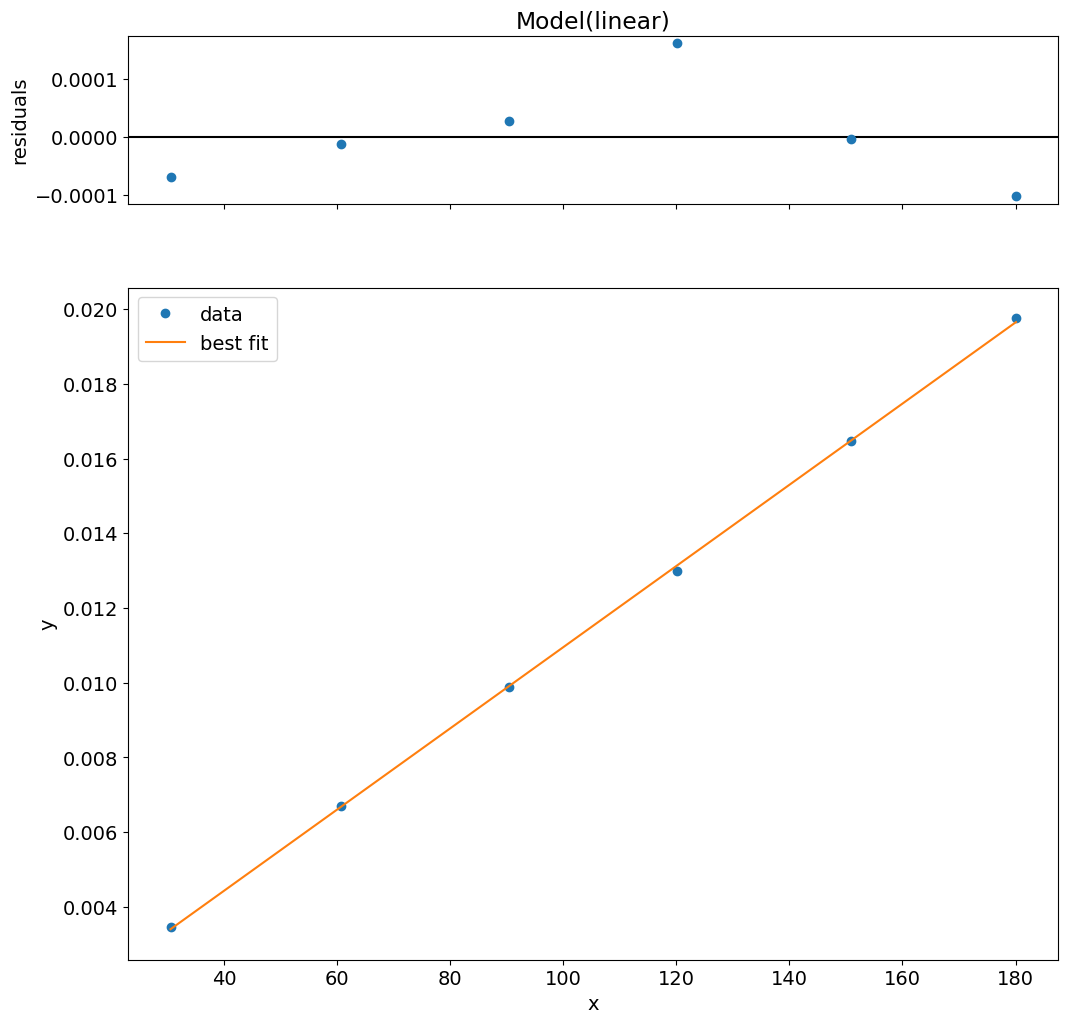

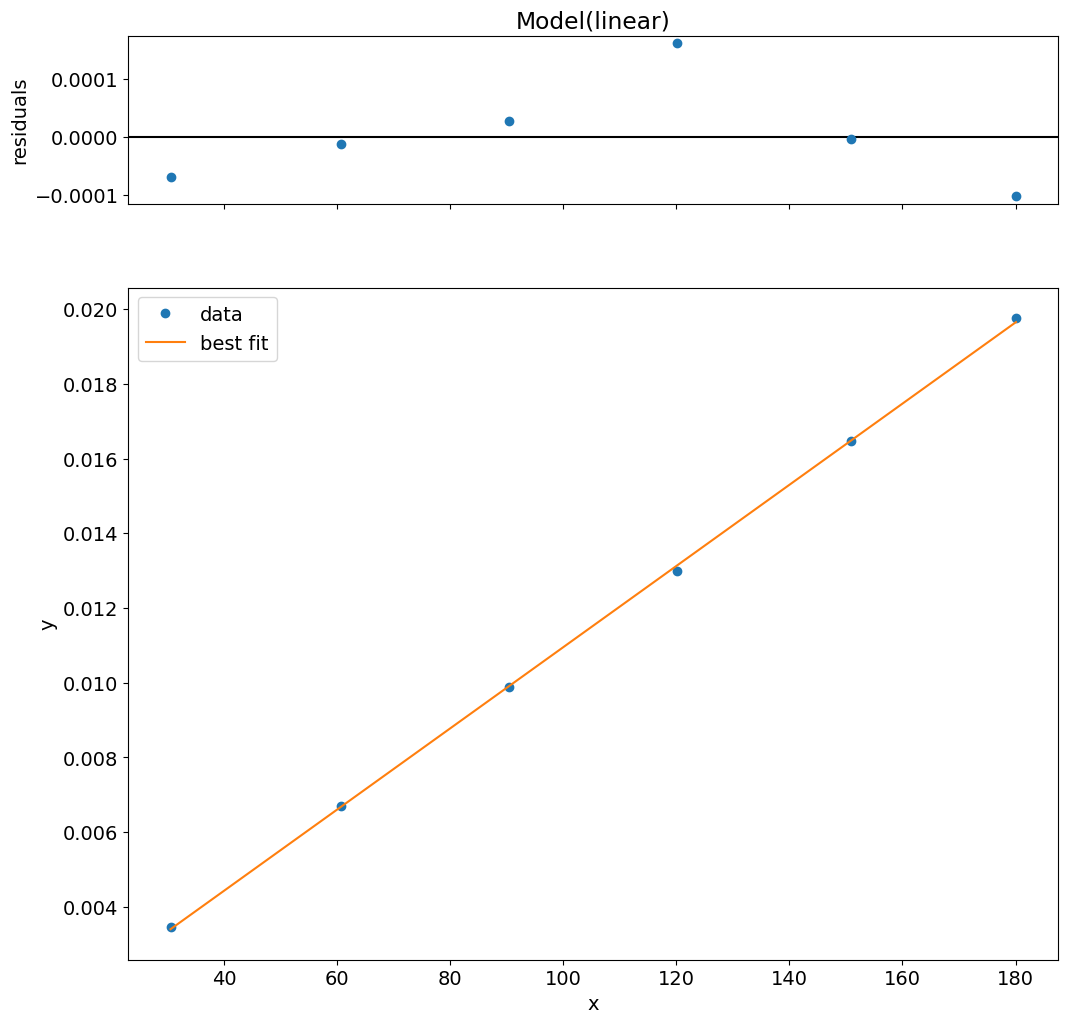

In [215]:
# Make a plot
Au_fit.plot()

In [216]:
# Get the slope, make an uncertainty object, and print it out

# See the examples for how to access fit parameters from the fit results
Au_slope = Au_fit.params['slope'].value


unc_au_slope = unc.ufloat(Au_slope, Au_fit.params['slope'].stderr, 'Au_slope')


# When you have the uncertainty object Al_slope, you can print it out this way:
print('2VH/Ix for gold = {:.2uP} V/A'.format(unc_au_slope))

2VH/Ix for gold = 0.00010871±0.00000082 V/A


In [217]:
# Get the thickness, calculate the Hall coefficient and print out the relative error contributions.

t_Au = unc.ufloat(1.37, 0.17e-7,'t_Au')

RH_Au = - unc_au_slope * t_Au / 2*uB

# Then calculate the Hall coefficient using your uncertainty object for B and the thickness.

print('The Hall coefficient for the gold probe is {:.2uP} m^3/A-s'.format(RH_Au))

print('Percent contribution to statistical uncertainty:')
for (var,error) in RH_Au.error_components().items():
    print('{:>6s}: {:.3%}'.format(var.tag,(error/RH_Au.s)**2))

The Hall coefficient for the gold probe is (-9.64±0.45)×10⁻⁵ m^3/A-s
Percent contribution to statistical uncertainty:
     B: 97.385%
  t_Au: 0.000%
Au_slope: 2.615%


### InAs probe

In [218]:
# Indium-Arsenide 
#
# Run the fit



InAs_param_guess = line.guess(InAs_averaged_df['2V_H (mV)'], x=InAs_averaged_df['Current (mA)'])


# Feed these into the fitter and run it.

InAs_fit = line.fit(InAs_averaged_df['2V_H (mV)'], InAs_param_guess, x=InAs_averaged_df['Current (mA)'])

# Print the results
InAs_fit


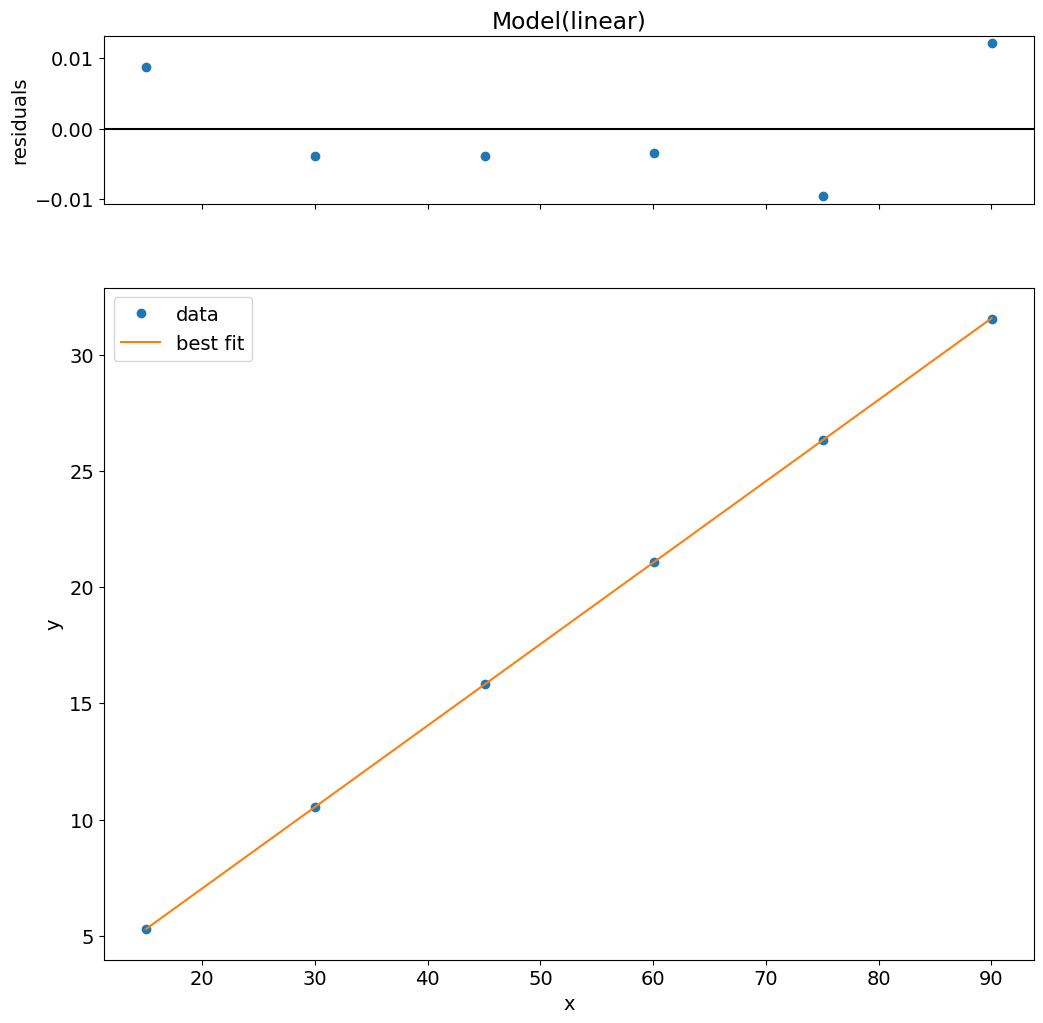

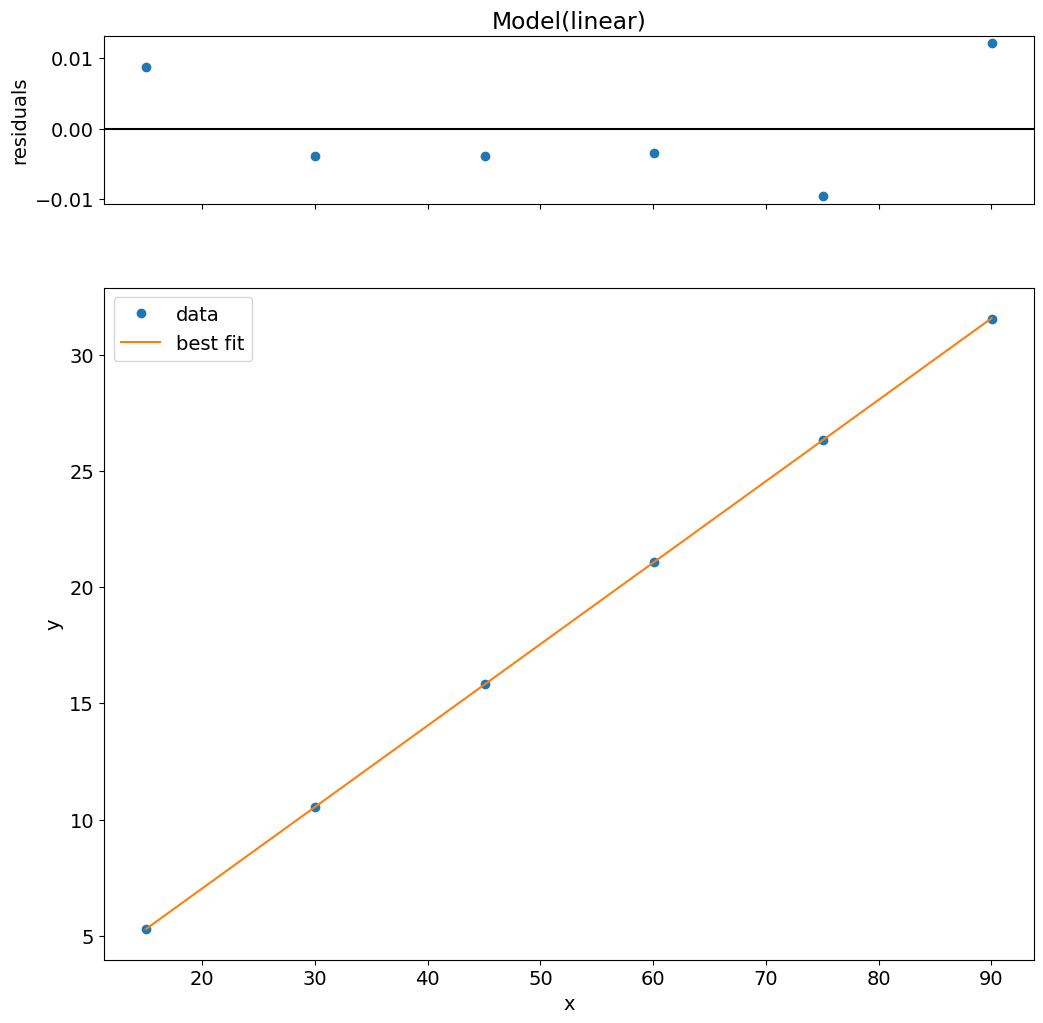

In [219]:
# Make a plot

InAs_fit.plot()

In [220]:
# Get the slope, make an uncertainty object, and print it out

# See the examples for how to access fit parameters from the fit results
InAs_slope = InAs_fit.params['slope'].value


unc_InAs_slope = unc.ufloat(InAs_slope, InAs_fit.params['slope'].stderr, 'InAs_slope')


# When you have the uncertainty object Al_slope, you can print it out this way:
print('2VH/Ix for InAs = {:.2uP} V/A'.format(unc_InAs_slope))

2VH/Ix for InAs = 0.35041±0.00015 V/A


In [221]:
# Get the thickness, calculate the Hall coefficient and print out the relative error contributions.

# Get the thickness, calculate the Hall coefficient and print out the relative error contributions.

t_InAs = unc.ufloat(1.26, 0.02e-4,'t_InAs')

RH_InAs = - unc_InAs_slope * t_InAs / 2*uB

# Then calculate the Hall coefficient using your uncertainty object for B and the thickness.

print('The Hall coefficient for the InAs probe is {:.2uP} m^3/A-s'.format(RH_InAs))

print('Percent contribution to statistical uncertainty:')
for (var,error) in RH_InAs.error_components().items():
    print('{:>6s}: {:.3%}'.format(var.tag,(error/RH_InAs.s)**2))

The Hall coefficient for the InAs probe is -0.286±0.013 m^3/A-s
Percent contribution to statistical uncertainty:
     B: 99.991%
t_InAs: 0.000%
InAs_slope: 0.009%


## Conductivity calculations

From equation (13) in the instructions

$$\sigma = \frac{\ell}{Rwt}$$

We use the data in table 1.

In [243]:
0.004/1000

4e-06

In [250]:
# Create uncertainty objects from the data in Table 1 for each sample

# All are 

# Gold:

w_Au = unc.ufloat(0.0127,5e-5,'w_Au')
l_Au = unc.ufloat(0.0305, 5e-5, 'l_Au')


# Aluminum:

w_Al = unc.ufloat(0.0127,5e-5, 'w_Al')
l_Al = unc.ufloat(0.0305, 5e-5, 'l_Al')

# InAs:
w_InAs = unc.ufloat(0.000692, 4e-06, 'w_InAs')
l_InAs = unc.ufloat(0.001542, 5e-06, 'l_InAs')


# Calculate the conductivity for each sample from the above




# Print the results WITH UNITS for each sample
sigma_Au = l_Au /(RH_Au * w_Au * t_Au)
print(f'The conductivity for the gold sample is: {sigma_Au} C/m^4')

sigma_Al = l_Al /(RH_Al * w_Al * t_Al)
print(f'The conductivity for the aluminum sample is: {sigma_Al} C/m^4')

sigma_InAs = l_InAs /(RH_InAs * w_InAs * t_InAs)
print(f'The conductivity for the aluminum sample is: {sigma_InAs} C/m^4')

The conductivity for the gold sample is: (-1.82+/-0.09)e+04 C/m^4
The conductivity for the aluminum sample is: (-2.19+/-0.12)e+04 C/m^4
The conductivity for the aluminum sample is: -6.19+/-0.29 C/m^4


# Check units !!!!!!!!!

### Calculate mobility for InAs probe

(Metal probe "mobility" is optional, because it does not mean very much.) From exercise 4

$$\mu = \sigma R_H$$

In [258]:
# Calculate the Carrier density of the InAs probe from the Hall coefficient and charge of the electron

# Scientific constants are in SciPy
import scipy.constants as const 
const.e # electron charge in coulombs

# Calculate the carrier density and print it WITH UNITS
n_InAs = 1 / (const.e * RH_InAs)

print(f'The carrier density for the InAs Probe is: {n_InAs} * 1/m^3')

# Claculate the mobility and print it WITH UNITS

mu_InAs = sigma_InAs * RH_InAs

print(f'The mobility for the InAs probe is: {mu_InAs}* 1/m')

The carrier density for the InAs Probe is: (-2.18+/-0.10)e+19 * 1/m^3
The mobility for the InAs probe is: 1.769+/-0.012* 1/m


In [224]:
# Optional: Mobility for metals, just because we can
